**Descripción general**
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


*Importar todas las libreria que utilizaremos en el Proyecto:*

In [121]:
import numpy as np
import sklearn as scikit_learn
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style

In [122]:
data = np.load('C:\R_File\Master of Data Science\Python\Project\proyecto_data\proyecto_training_data.npy') 

In [123]:
xx = data
training_idx = np.random.randint(xx.shape[0], size=80)
test_idx = np.random.randint(xx.shape[0], size=20)
training, test = xx[training_idx,:], xx[test_idx,:]

In [124]:

casadf = pd.DataFrame(training)
casadf.rename(columns={   0 :'precio',
                          1:'Calif',
                          2:'fsqrt',
                          3 :'trooms',
                          4: 'yearbuilt',
                          5 : 'LotFrontage'}, 
                 inplace=True)
casadf['precio']= casadf['precio']/1000
casadf.fillna(0,inplace=True)

In [125]:
casadf.describe(include='all')

,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,175.351837,5.987500,1114.162500,6.462500,1973.412500,55.350000
std,89.445190,1.247719,358.318946,1.606504,27.277149,29.264443
min,79.000000,3.000000,483.000000,4.000000,1910.000000,0.000000
25%,125.875000,5.000000,864.750000,5.000000,1955.500000,35.750000
50%,157.000000,6.000000,1001.000000,6.000000,1976.000000,63.000000
75%,194.500000,7.000000,1319.250000,8.000000,1998.250000,74.250000
max,755.000000,10.000000,2444.000000,11.000000,2009.000000,120.000000


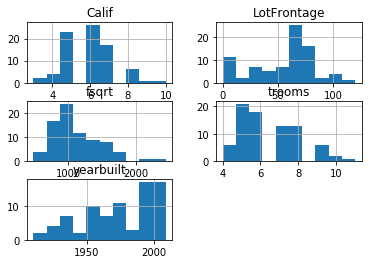

In [126]:
casadf.drop(['precio'],1).hist()
plt.show()

In [127]:

casadf.corr(method='pearson', min_periods=1)


,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
precio,1.000000,0.704054,0.559395,0.541898,0.408996,0.249974
Calif,0.704054,1.000000,0.268327,0.381821,0.469525,0.086789
fsqrt,0.559395,0.268327,1.000000,0.303833,0.196963,0.211360
trooms,0.541898,0.381821,0.303833,1.000000,-0.014519,0.157523
yearbuilt,0.408996,0.469525,0.196963,-0.014519,1.000000,0.038335
LotFrontage,0.249974,0.086789,0.211360,0.157523,0.038335,1.000000


(80, 1)
(80,)


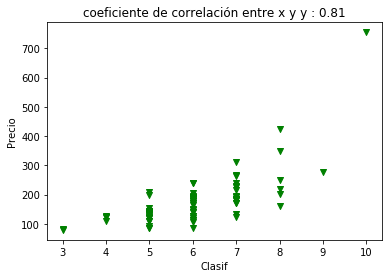

In [128]:


X = casadf.drop(["precio","fsqrt","yearbuilt","LotFrontage","trooms"], axis=1).values
Y = casadf["precio"].values

print(X.shape)
print(Y.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.scatter(X, Y,marker="v",color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'#
#ax.scatter(x, y,color="g")  # experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'

ax.set_xlabel('Clasif')
ax.set_ylabel('Precio')
ax.set_title('coeficiente de correlación entre x y y : 0.81')

plt.show()

In [159]:
parametros = np.array([0.1,0.2])
unos = np.ones((len(X),1))
uno = np.squeeze(np.asarray(unos))
X   = np.squeeze(np.asarray(X))
X_b = np.c_[X,unos]
m_current = 0
b_current = 0
error = 0
N = float(len(Y))
learning_rate=0.1
lossHistory = []
histepoch = []
for epoch in np.arange(2, 15,3):
	yhat = (np.dot(X_b , parametros))
	error += (Y-yhat) 
	cost = np.sum(error **2)*(0.5) /1000000 #testing
	m_gradient =  sum(X * (Y - yhat[0]))
	b_gradient =  sum(Y - yhat[1])
	m_current += m_current - (learning_rate * m_gradient)
	b_current += b_current - (learning_rate * b_gradient)
	lossHistory.append(cost)
	histepoch.append(epoch)
	print(cost,epoch+1)


1.5341485493545002 3
6.136594197418001 6
13.807336944190498 9
24.546376789672003 12
38.3537137338625 15


In [160]:
dataf = pd.DataFrame(lossHistory)

dataf['epoch'] = np.arange(len(dataf))

dataf



,0,epoch
0,1.534149,0
1,6.136594,1
2,13.807337,2
3,24.546377,3
4,38.353714,4


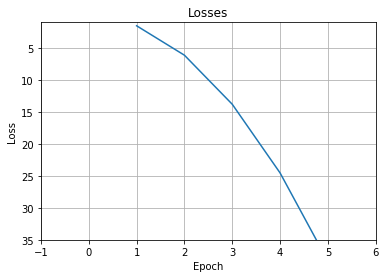

In [161]:



x = epoch_count
y = lossHistory

fig = plt.figure()
ax = fig.add_subplot(111) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.grid()
ax.set_xlim(-1,6)
ax.set_ylim(35,1)
ax.plot(x,y)

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Losses')

plt.show()

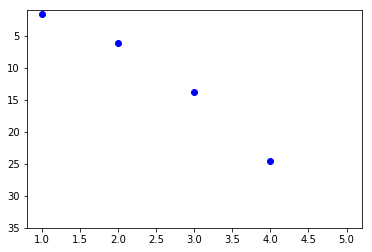

In [162]:
x = epoch_count
y = lossHistory

x_error = 0.08*np.random.randn(len(x)) #medida del error en x
y_error = 0.1*np.random.randn(len(y)) #medida del error en y

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_ylim(35,1)
ax.errorbar(x,y,ecolor="r",fmt="bo",elinewidth=1)

plt.show()


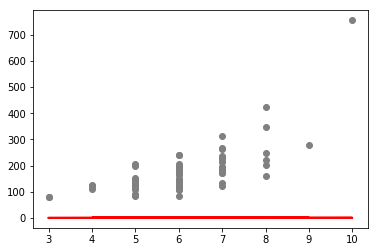

63.900000000000006


In [164]:

y= m_current *X+ b_current

plt.scatter(X, Y,  color='gray')
plt.plot(X, yhat, color='red', linewidth=2)
plt.show()
print(np.sum(yhat))


In [155]:
test.data.shape
testpd = pd.DataFrame(test)
testpd.fillna(0 ,inplace=True)
print(testpd.head())

          0    1       2     3       4     5
0  214900.0  7.0   824.0   8.0  2002.0  80.0
1  127500.0  5.0   808.0   6.0  1940.0  62.0
2  202500.0  7.0  1368.0   6.0  2005.0  48.0
3  175000.0  6.0  1041.0   7.0  1968.0  90.0
4  190000.0  5.0  1361.0  12.0  1977.0   0.0


In [156]:
# Make a prediction with coefficients
def predict(row, coefficients):
yhat = coefficients[0]
for i in range(len(row)-1):
yhat += coefficients[i + 1] * row[i]
return yhat   


IndentationError: expected an indented block (<ipython-input-156-eb5f77c83fd5>, line 3)

In [120]:
trainingpd.rename(columns={   0 :'precio',
                          1:'Calif',
                          2:'fsqrt',
                          3 :'trooms',
                          4: 'yearbuilt',
                          5 : 'LotFrontage'}, 
                 inplace=True)
trainingpd['precio']= trainingpd['precio']/1000

trainingpd.describe(include='all')

NameError: name 'trainingpd' is not defined

In [ ]:

import numpy as np
import sklearn as scikit_learn
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    for epoch in range(n_epoch):
        sum_error = 0
    for row in train:
        yhat = predict(row, coef)
    error = yhat - row[-1]
    sum_error += error**2
    for i in range(len(row)-1):
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef
 


In [ ]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
l_rate = 0.001
n_epoch = 50
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train)
print(X_test)